In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from ghost_xarray import open_dataarray

output_dir = Path("problema4/output")

## 4)
> Haciendo uso del solver BOUSS en GHOST,
resuelva numéricamente las ecuaciones para un flujo incompresible
con $ρ_0 = 1$, $ν = κ = 3 × 10^{−3}$
en un recinto cubico de longitud lineal $2π$
y resolución espacial $N_x = N_y = N_z = 128$.
Hacer uso del Material Adicional.
Imponga un viento horizontal uniforme $u = U x̂$ (con $U = 1$),
y perturbe este viento con una fuerza $f = f_0 ẑ$
confinada a una banda vertical con $x ∈ [0, π/10]$.
Observe que este es un modelo simplificado
para el estudio de ondas de sotavento.

### (a)
> Para $f_0 = 0.1$,
integre el sistema hasta $t = 5$
con una frecuencia de Brunt-Väisälä $N = 10$.
Verifique que se genera una onda estacionaria.
*Ayuda: puede guardar los campos cada $∆t = 0.5$,
y observar cortes de la temperatura en el plano $x̂ − ẑ$.*

In [2]:
def load_temperature(N, *, chunks={}):
    return open_dataarray(
        output_dir / f"N_{N}",
        name="th",
        dt=0.5,
        shape=(128, 128, 128),
        dtype=np.float32,
    )
    
T = load_temperature(10)

Mirando un corte en el plano $x-z$,
a $y=64$,
se observa que,
a medida que pasa el tiempo,
se genera una onda en la dirección $\hat{x}$:

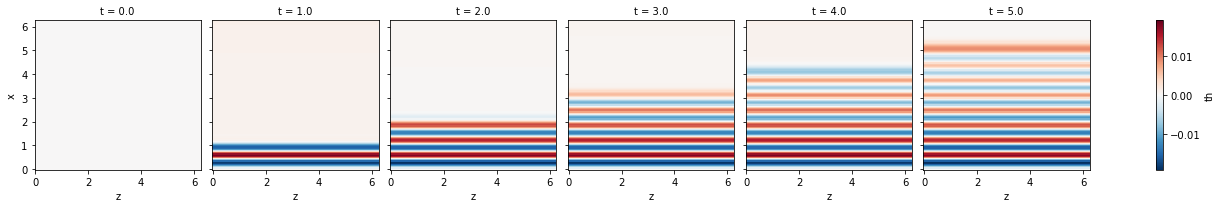

In [26]:
T.isel(t=slice(0,None,2), y=64).plot(col="t")

Tomando una linea a $z=64$ de estos planos,
podemos ver la amplitud de la onda que se genera
a lo largo del eje $\hat{x}$:

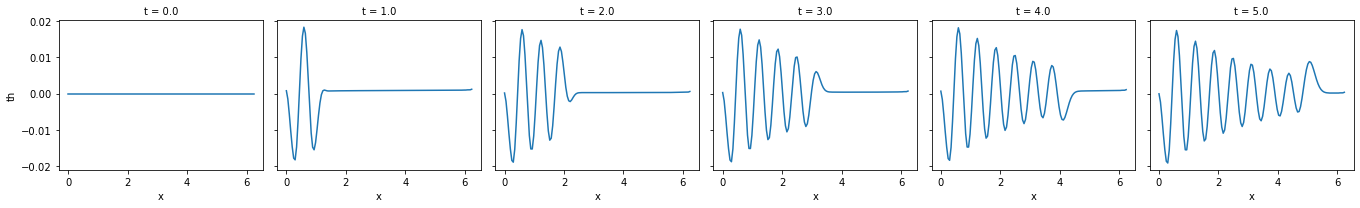

In [4]:
T.isel(t=slice(0,None,2), y=64, z=64).plot(col="t")

Superponiendo estas ondas en el mismo gráfico,
vemos que la onda es estacionaria,
es decir, los picos no viajan hacia $x>0$:

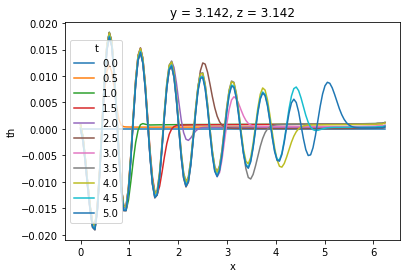

In [24]:
T.isel(y=64, z=64).plot.line(hue="t");

### (b)
> Estudie la longitud de onda de la onda estacionaria
en función de la frecuencia de Brunt-Väisälä $N$,
variándola entre $1$ y $15$ (pasos de a $3$).

Para estimar la frecuencia de la onda,
buscamos sus picos a lo largo del eje $\hat{x}$,
calculamos la distancia entre picos,
y promediamos.
En particular,
elegimos un solo corte a $y=64$ y $z=64$,
para el tiempo final.

La frecuencia de Brunt-Väisälä
es la frecuencia angular de estas ondas:

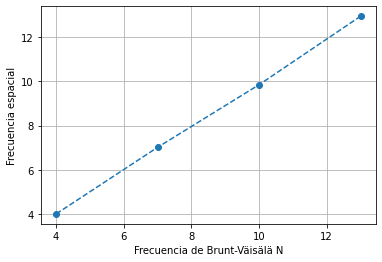

In [5]:
def calc_angular_frequency(n):
    T = load_temperature(n)
    Tx = T.isel(t=-1, y=64, z=64).to_numpy()
    ix, _ = find_peaks(Tx, height=Tx.max() / 10)
    period = T.x[ix].diff("x").mean()
    return 2 * np.pi / period

N = np.arange(1, 15, 3)[1:]
spatial_freq = np.array([calc_angular_frequency(n) for n in N])

plt.plot(N, spatial_freq, 'o--')
plt.xlabel("Frecuencia de Brunt-Väisälä N")
plt.ylabel("Frecuencia espacial")
plt.grid()